Створення набору даних з неперервними цільовими значеннями...
Набір даних з неперервними цільовими значеннями згенеровано і збережено у файл 'Continuous_Database.csv'.
Генерація випадкового набору даних для регресії...
Випадковий набір даних з неперервними цільовими значеннями згенеровано і збережено у файл 'Random_Continuous_Database.csv'.
Завантаження набору даних з Kaggle...
Набір даних Kaggle завантажено:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c  

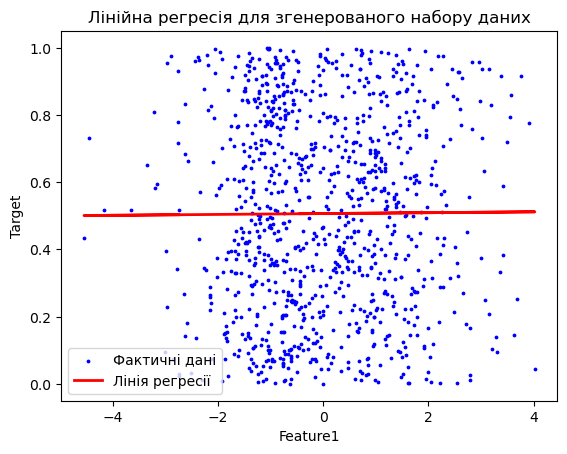

MSE: 0.0855; MAE: 0.2541; R2: 0.0000


In [15]:
# Необхідні бібліотеки
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Створення набору даних з неперервними цільовими значеннями
print("Створення набору даних з неперервними цільовими значеннями...")
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
y_continuous = np.random.rand(1000)  # Генерація неперервних цільових значень на інтервалі [0, 1]

# Створення DataFrame
df = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(X.shape[1])])
df['Target'] = y_continuous  # Замість бінарних міток використовуємо неперервні
df.to_csv('Continuous_Database.csv', index=False)
print("Набір даних з неперервними цільовими значеннями згенеровано і збережено у файл 'Continuous_Database.csv'.")

# 3. (Опціонально) Генерація випадкового набору даних для класифікації з неперервними цільовими значеннями
print("Генерація випадкового набору даних для регресії...")
X_random = np.random.rand(500, 3)  # 500 прикладів, 3 ознаки
y_random_continuous = np.random.rand(500)  # Неперервні цільові значення
random_df = pd.DataFrame(X_random, columns=['Feature1', 'Feature2', 'Feature3'])
random_df['Target'] = y_random_continuous
random_df.to_csv('Random_Continuous_Database.csv', index=False)
print("Випадковий набір даних з неперервними цільовими значеннями згенеровано і збережено у файл 'Random_Continuous_Database.csv'.")


# 2. Завантаження набору даних для класифікації з сайту Kaggle
print("Завантаження набору даних з Kaggle...")
try:
    kaggle_df = pd.read_csv('C:/Users/Admin/.kaggle/mushrooms.csv')
    print("Набір даних Kaggle завантажено:")
    print(kaggle_df.head())
except FileNotFoundError:
    print("Помилка: файл 'mushrooms.csv' не знайдено.")


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 4. Моделювання для отриманих наборів даних з використанням лінійної регресії та побудова графіків
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Лінійна регресія для згенерованого набору даних
print("Проведення моделювання з використанням лінійної регресії для згенерованого набору даних...")

# Завантаження даних
df = pd.read_csv('Continuous_Database.csv')

# Вибираємо першу ознаку як X і цільову змінну як y
X = df[['Feature1']]  # Можна використовувати більше ознак, якщо потрібно
y = df['Target']

# Створюємо модель лінійної регресії та навчаємо її
model = LinearRegression()
model.fit(X, y)

# Передбачаємо значення
y_pred = model.predict(X)

# Побудова графіку
plt.scatter(X, y, color='blue', label='Фактичні дані', s=3)
plt.plot(X, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Лінійна регресія для згенерованого набору даних')
plt.legend()
plt.show()

# Оцінка моделі
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE: {mse:.4f}; MAE: {mae:.4f}; R2: {r2:.4f}')
